<a href="https://colab.research.google.com/github/shuhbam199/FebGithub/blob/main/Employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk


Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 13.4MB/s]


In [ ]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [ ]:
df_new =  df[['MaritalStatus_Single','EducationField','JobRole','MaritalStatus_Married','StockOptionLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','OverTime','Age']]

No field with null cells

In [ ]:
df.iloc[:, 15:]

,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


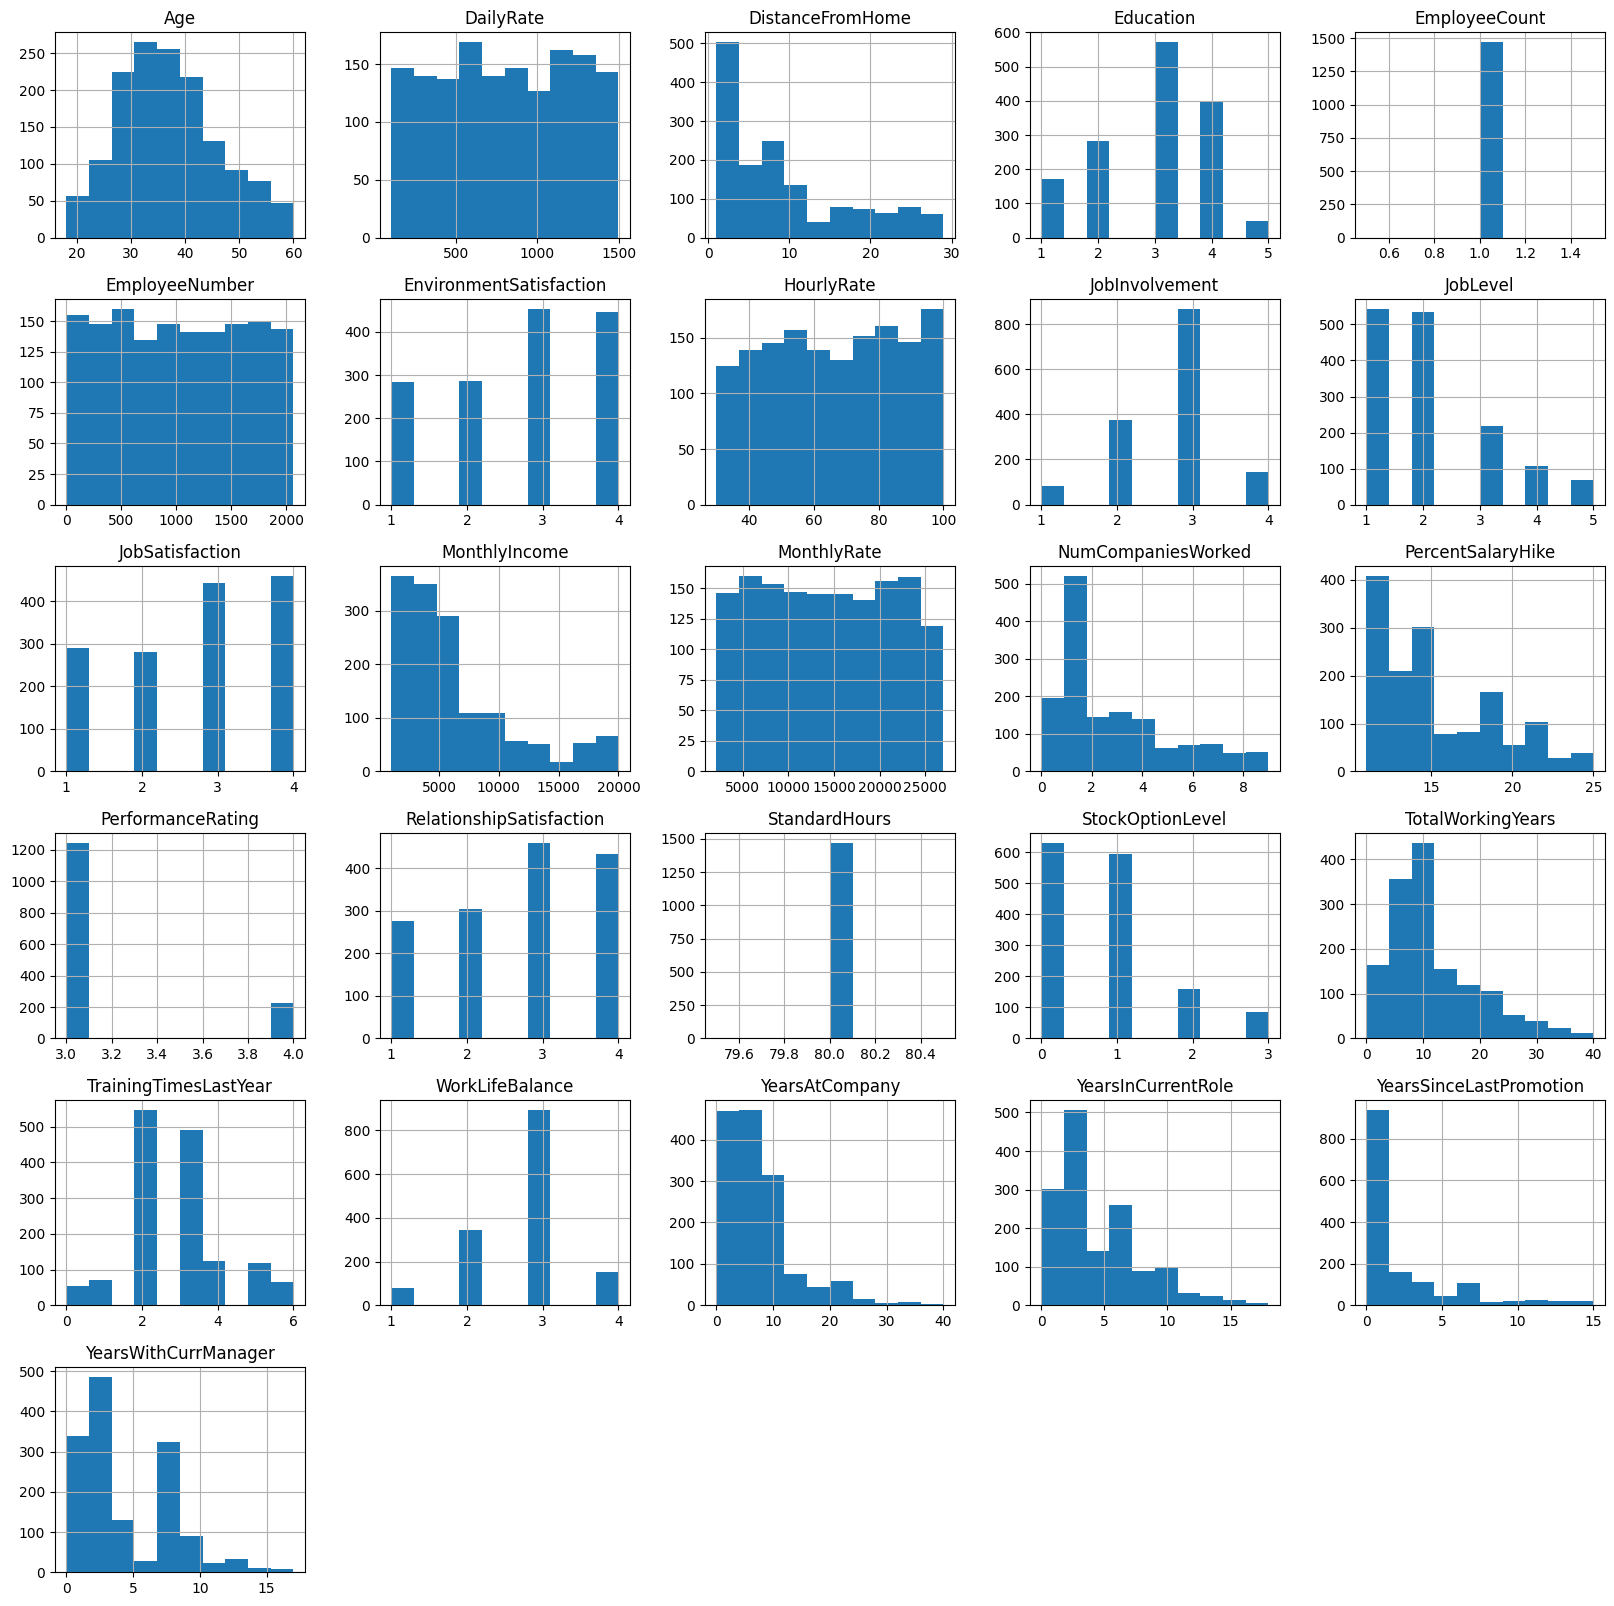

In [ ]:
df.hist(figsize = (20,20))
plt.show()

What can we observe from these plots ?


Many histograms are tail-heavy

Lot of attributes are right-skewed
(e.g. MonthlyIncome DistanceFromHome, YearsAtCompany)

Data transformation methods may be required for standardisation

Recall why standardisation is preferred ?
Some features seem to have normal distributions

Eg: Age:
Slightly right-skewed normal distribution
Bulk of the staff between 25 and 45 years old
Some features are constant

Eg: EmployeeCount and StandardHours are constant values for all employees.

They're likely to be redundant features.

How can these features contribute to our problem ?
Constant features are not in any way useful for predictions
So we can drop these features from the dataset
Some features seem to be uniformly distributed.

Eg: EmployeeNumber

Uniformly distributed and constant features won't contribute to our analysis. Why?

Each value is equally likely to occur
So what should we do ?
We can drop these features from our dataset
Some features are categorical i.e binomially/multinomially distributed

Eg: WorkLifeBalance, StockOptionLevel etc

Can we use these features directly in our problem ?
No. They willl first have to be encoded
Recall which encoding has to be used for which features
Binary Encoding (0/1) : Features with only 2 unique values

Label Encoding (0, 1, 2, 3 ....) : More than 2 unique values having a particular order

OneHot Encoding ([0 0 0 1], ...) : More than 2 unique values having no order

Target encoding ([0.1, 0.33, .....)] : Features with a lot of unique vals having no order

We can also see from these features that their ranges vary a lot

Recall why different feature scales can be a problem

We will deal with this problem later

First, lets remove the features that won't contribute to our analysis

In [ ]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

Now lets encode our categorical features

#### Which encoding technique should we use ?

  - It depends upon:
    - Number of unique values a feature has
    - If there is a sequence between the feature vals

Lets first check how many unique values each feature has


In [ ]:
def unique_vals(col):

  if col.dtype == "object":

    print(f'{col.name}: {col.nunique()}')
    print(col.value_counts())

df.apply(unique_vals)

Attrition: 2
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel: 3
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department: 3
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField: 6
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender: 2
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole: 9
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus: 3
MaritalStatus
Ma

,0
Age,None
Attrition,None
BusinessTravel,None
DailyRate,None
Department,None
DistanceFromHome,None
Education,None
EducationField,None
EnvironmentSatisfaction,None
Gender,None


#### On basis of this info, which encoding technique should we use ?

 - We will use binary encoding for features with 2 or less unique val.
 - For features < 6 unique vals we will use OneHot encoding
 - Rest of the categorical features will be Target encoded


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

def label_encode(ser):

    if ser.dtype=="object" and ser.nunique() <= 2:
      print(ser.name)

      le.fit(ser)
      ser = le.transform(ser)

    return ser

df = df.apply(lambda col: label_encode(col))
# convert rest of categorical variable into dummy
df = pd.get_dummies(df, columns = ["BusinessTravel", "Department", "MaritalStatus"], drop_first = True)
df.head()


Attrition
Gender
Over18
OverTime


,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,Life Sciences,1,1,2,0,...,6,4,0,5,False,True,False,True,False,True
1,49,0,279,8,1,Life Sciences,1,2,3,1,...,10,7,1,7,True,False,True,False,True,False
2,37,1,1373,2,2,Other,1,4,4,1,...,0,0,0,0,False,True,True,False,False,True
3,33,0,1392,3,4,Life Sciences,1,5,4,0,...,8,7,3,0,True,False,True,False,True,False
4,27,0,591,2,1,Medical,1,7,1,1,...,2,2,2,2,False,True,True,False,True,False


In [ ]:
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4])

In [ ]:
df['MaritalStatus_Married'] = df['MaritalStatus_Married'].map({True:1, False:0})

In [ ]:
df_new = df[['MaritalStatus_Married','StockOptionLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','OverTime','Age','Attrition',
             'EducationField','WorkLifeBalance', 'JobRole']]

In [ ]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,Life Sciences,1,1,2,0,...,6,4,0,5,False,True,False,True,0,True
1,49,0,279,8,1,Life Sciences,1,2,3,1,...,10,7,1,7,True,False,True,False,1,False
2,37,1,1373,2,2,Other,1,4,4,1,...,0,0,0,0,False,True,True,False,0,True
3,33,0,1392,3,4,Life Sciences,1,5,4,0,...,8,7,3,0,True,False,True,False,1,False
4,27,0,591,2,1,Medical,1,7,1,1,...,2,2,2,2,False,True,True,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,Medical,1,2061,3,1,...,5,2,0,3,True,False,True,False,1,False
1466,39,0,613,6,1,Medical,1,2062,4,1,...,7,7,1,7,False,True,True,False,1,False
1467,27,0,155,4,3,Life Sciences,1,2064,2,1,...,6,2,0,3,False,True,True,False,1,False
1468,49,0,1023,2,3,Medical,1,2065,4,1,...,9,6,0,8,True,False,False,True,1,False


In [ ]:
target = df_new['Attrition'].copy()
df_new = df_new.drop(["Attrition"], axis = 1)
target.value_counts()

,count
Attrition,
0,1233
1,237


The dataset is extremely imbalanced
Recall how we deal with imbalanced data
For this dataset we will use SMOTE oversampling technique to balance the data

But SMOTE is applied only to training set

So we need to split the data first

In [ ]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 10)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 10)
Number transactions y_test dataset:  (368,)


In [ ]:
!pip install category_encoders

In [ ]:
X_train

,MaritalStatus_Married,StockOptionLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,OverTime,Age,EducationField,WorkLifeBalance,JobRole
1011,0,0,2,9278,20763,1,36,0.233869,3,0.174089
1152,0,0,4,3117,26009,0,21,0.127479,3,0.160714
650,1,1,4,5562,21782,0,43,0.151584,2,0.063212
824,0,0,4,4272,9558,0,42,0.127479,3,0.243386
1108,0,0,1,2450,21731,0,35,0.127479,3,0.243386
...,...,...,...,...,...,...,...,...,...,...
660,0,1,4,2380,13384,1,58,0.151584,2,0.243386
780,0,0,1,8722,12355,0,28,0.239544,2,0.063212
880,1,1,2,2743,7331,0,32,0.138715,3,0.243386
1313,0,3,1,2335,3157,1,29,0.197675,3,0.187588


In [ ]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['EducationField', 'JobRole'])
X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)
import pickle
with open('ce_target4.pkl', 'wb') as f:
    pickle.dump(ce_target, f)

from google.colab import files
files.download('ce_target4.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train

,EducationField,JobRole
1011,0.233869,0.174089
1152,0.127479,0.160714
650,0.151584,0.063212
824,0.127479,0.243386
1108,0.127479,0.243386
...,...,...
660,0.151584,0.243386
780,0.239544,0.063212
880,0.138715,0.243386
1313,0.197675,0.187588


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 924, 1: 924})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)

In [ ]:
X_sm

,MaritalStatus_Married,StockOptionLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,OverTime,Age
0,0,0,2,9278,20763,1,36
1,0,0,4,3117,26009,0,21
2,1,1,4,5562,21782,0,43
3,0,0,4,4272,9558,0,42
4,0,0,1,2450,21731,0,35
...,...,...,...,...,...,...,...
1843,0,0,1,2349,21022,0,19
1844,0,0,3,2925,19782,0,20
1845,0,0,2,2363,25696,0,29
1846,0,0,1,2309,14476,1,33


In [ ]:
rfc = RandomForestClassifier(random_state=7)
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [8, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'oob_score': [True],  # only when bootstrap=True
    'ccp_alpha': [0.02, 0.01]     # minimal cost-complexity pruning
}

# Setup GridSearchCV
grid = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=4,
                           scoring='accuracy',  # you can change to 'f1', 'recall', etc.
                           n_jobs=-1,
                           verbose=2)

grid = grid.fit(X_sm, y_sm)
pred = grid.predict(X_test)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1152 fits failed out of a total of 2304.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1152 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 448, in fit
    raise ValueError("Out o

In [ ]:
grid.best_estimator_

RandomForestClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5, oob_score=True,
                       random_state=7)

In [ ]:
import pickle

with open('rf.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
from google.colab import files
files.download('rf.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 23.52222222222222, 'Predicted label')

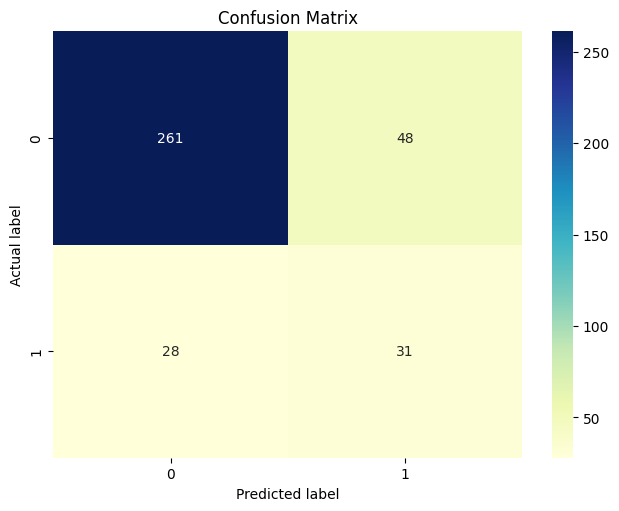

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       309
           1       0.39      0.53      0.45        59

    accuracy                           0.79       368
   macro avg       0.65      0.69      0.66       368
weighted avg       0.82      0.79      0.80       368



In [ ]:
from google.colab import files
files.download("Employee_attrition.ipynb")

FileNotFoundError: Cannot find file: Employee_attrition.ipynb

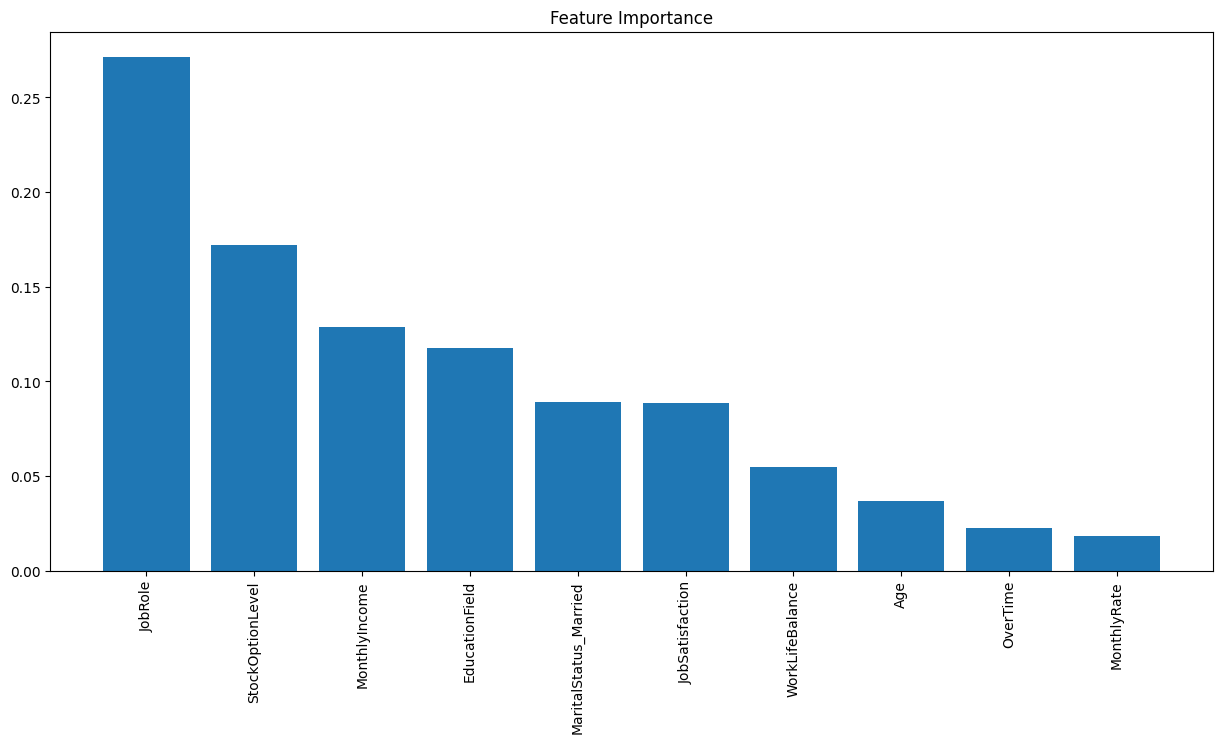

In [190]:
importances = grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

Means out of our actual number of employees who are gonna leave, we predicted 53%. This is a good number.